# 2. Logistická Regrese: Trénování a Evaluace v Pythonu

## 2.1 Cíl lekce

V tomto notebooku se naučíme:
- Jak funguje trénování logistické regrese
- Jak rozdělovat data na trénovací a testovací sadu
- Jak hodnotit kvalitu klasifikačního modelu pomocí různých metrik
- Jak interpretovat naučené koeficienty modelu

## 2.2 Princip trénování modelu

### Co je trénování?
Trénování je proces, kdy počítač hledá nejlepší parametry modelu ($\beta_0$ a $\beta_1$), které nejlépe popisují vztah mezi vstupními daty a výstupem.

### Metoda maximální věrohodnosti (MLE)
Počítač zkouší různé kombinace parametrů a hledá takové, pro které je **pravděpodobnost pozorování našich dat nejvyšší**.

### Intuitivní příklad:
Představte si detektiva, který:
1. **Má důkazy** (naše data - kdo prošel zkouškou a kdo ne)
2. **Zkouší různé teorie** (různé hodnoty parametrů)
3. **Vybere nejlepší teorii** (parametry s maximální věrohodností)

### Gradient Descent
Algoritmus, který iterativně upravuje parametry tak, aby se "šplhal" k vrcholu věrohodnosti:
- Začne s náhodnými parametry
- Vypočítá, kterým směrem se zlepšit
- Udělá malý krok tím směrem
- Opakuje, dokud nenajde vrchol

## 2.3 Rozdělení dat: Trénovací a testovací sada

### Proč rozdělujeme data?
Potřebujeme ověřit, že model funguje i na datech, která nikdy neviděl.

### Typické rozdělení:
- **Trénovací sada (70-80%)**: Data pro učení modelu
- **Testovací sada (20-30%)**: Data pro ověření kvality

### Příklad rozdělení:
| Celkem dat | Trénovací sada (70%) | Testovací sada (30%) |
|------------|---------------------|----------------------|
| 100 studentů | 70 studentů | 30 studentů |
| 1000 zákazníků | 700 zákazníků | 300 zákazníků |

### Stratifikované rozdělení
Zajistí, že poměr tříd zůstane stejný v obou sadách:
- Původní data: 60% prošlo, 40% neprošlo
- Trénovací sada: 60% prošlo, 40% neprošlo
- Testovací sada: 60% prošlo, 40% neprošlo

## 2.4 Škálování dat

### Proč škálovat?
Různé proměnné mají různé škály:
- Věk: 20-60 (rozsah 40)
- Plat: 20000-130000 (rozsah 110000)

Bez škálování by plat dominoval jen kvůli větším číslům!

### StandardScaler - standardizace
Převede data tak, aby měla průměr 0 a směrodatnou odchylku 1.

**Vzorec:**
$$z = \frac{x - \mu}{\sigma}$$

**Vysvětlení symbolů:**
- $z$ = standardizovaná hodnota (výsledek)
- $x$ = původní hodnota (např. věk 35 let)
- $\mu$ = průměr všech hodnot dané proměnné
- $\sigma$ = směrodatná odchylka dané proměnné
- $\frac{x - \mu}{\sigma}$ = odečteme průměr a vydělíme směrodatnou odchylkou

### Příklad standardizace:
| Původní věk | Po standardizaci |
|-------------|------------------|
| 20 let | -1.5 |
| 40 let | 0.0 |
| 60 let | +1.5 |

## 2.5 Evaluační metriky

### 2.5.1 Confusion Matrix (Matice záměn)

Tabulka zobrazující všechny možné výsledky predikce:

|                | Predikce: Neprošel (0) | Predikce: Prošel (1) |
|----------------|------------------------|---------------------|
| **Skutečně: Neprošel (0)** | TN | FP |
| **Skutečně: Prošel (1)** | FN | TP |

**Vysvětlení zkratek:**
- **TP** (True Positive) = Správně předpovězeno "prošel"
- **TN** (True Negative) = Správně předpovězeno "neprošel" 
- **FP** (False Positive) = Chybně předpovězeno "prošel" (ale neprošel)
- **FN** (False Negative) = Chybně předpovězeno "neprošel" (ale prošel)

### 2.5.2 Accuracy (Přesnost)

Kolik procent předpovědí bylo správných?

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

**Vysvětlení:**
- $TP + TN$ = počet správných předpovědí (součet správně pozitivních a správně negativních)
- $TP + TN + FP + FN$ = celkový počet všech předpovědí
- $\frac{\text{správné}}{\text{všechny}}$ = podíl správných předpovědí

### 2.5.3 Precision (Přesnost pozitivní třídy)

Z těch, které model označil jako pozitivní, kolik jich skutečně bylo pozitivních?

$$\text{Precision} = \frac{TP}{TP + FP}$$

**Vysvětlení:**
- $TP$ = správně předpovězené pozitivní
- $TP + FP$ = všechny předpovězené jako pozitivní
- $\frac{TP}{TP + FP}$ = podíl správných z předpovězených pozitivních

### 2.5.4 Recall (Senzitivita)

Ze všech skutečně pozitivních, kolik jich model našel?

$$\text{Recall} = \frac{TP}{TP + FN}$$

**Vysvětlení:**
- $TP$ = správně nalezené pozitivní
- $TP + FN$ = všechny skutečně pozitivní
- $\frac{TP}{TP + FN}$ = podíl nalezených ze skutečně pozitivních

### 2.5.5 F1-Score

Harmonický průměr precision a recall:

$$F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

**Vysvětlení:**
- $\text{Precision} \cdot \text{Recall}$ = součin precision a recall
- $\text{Precision} + \text{Recall}$ = součet precision a recall
- $2 \cdot \frac{\text{součin}}{\text{součet}}$ = harmonický průměr
- Hodnota mezi 0 a 1, čím vyšší, tím lepší

## 2.6 ROC křivka a AUC

### ROC křivka (Receiver Operating Characteristic)

Graf zobrazující výkon klasifikátoru při různých prazích rozhodování.

**Osy grafu:**
- **Osa X:** False Positive Rate (FPR) = $\frac{FP}{FP + TN}$
- **Osa Y:** True Positive Rate (TPR) = $\frac{TP}{TP + FN}$

**Vysvětlení FPR:**
- $FP$ = počet chybně pozitivních
- $FP + TN$ = všechny skutečně negativní
- $\frac{FP}{FP + TN}$ = podíl chybně označených jako pozitivní ze skutečně negativních

**Vysvětlení TPR:**
- $TP$ = počet správně pozitivních
- $TP + FN$ = všechny skutečně pozitivní
- $\frac{TP}{TP + FN}$ = podíl správně nalezených pozitivních (= Recall)

### AUC (Area Under Curve)

Plocha pod ROC křivkou:
- **AUC = 1.0**: Perfektní klasifikátor
- **AUC = 0.5**: Náhodné hádání (diagonála)
- **AUC > 0.7**: Dobrý model
- **AUC > 0.9**: Vynikající model

## 2.7 Interpretace koeficientů

### Rovnice logistické regrese

$$\log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

**Vysvětlení symbolů:**
- $p$ = pravděpodobnost pozitivní třídy (např. že student projde)
- $1-p$ = pravděpodobnost negativní třídy
- $\frac{p}{1-p}$ = odds (šance) - poměr pravděpodobností
- $\log(...)$ = přirozený logaritmus
- $\beta_0$ = intercept (základní hodnota)
- $\beta_1, \beta_2$ = koeficienty (váhy) pro proměnné
- $x_1, x_2$ = hodnoty proměnných (např. věk, plat)

### Interpretace koeficientů:

| Hodnota koeficientu | Interpretace | Příklad |
|---------------------|--------------|----------|
| $\beta > 0$ (kladný) | Zvýšení proměnné zvyšuje pravděpodobnost | Více hodin učení → vyšší šance projít |
| $\beta < 0$ (záporný) | Zvýšení proměnné snižuje pravděpodobnost | Více absence → nižší šance projít |
| $|\beta|$ velké | Silný vliv proměnné | Hodiny učení mají velký vliv |
| $|\beta|$ malé | Slabý vliv proměnné | Barva pera má minimální vliv |

## 2.8 Import knihoven

Nyní, když rozumíme všem konceptům, můžeme importovat potřebné knihovny:

In [1]:
# Import knihoven pro práci s daty a modely
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, roc_auc_score)

## 2.9 Praktická implementace

### 2.9.1 Příprava dat

In [2]:
# Vytvoření minimálního datasetu
data = {
    'Vek': [18, 25, 35, 42, 50, 22, 31, 48, 55, 60],
    'Plat': [20000, 45000, 60000, 80000, 100000, 30000, 55000, 95000, 120000, 130000],
    'Koupil': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# Rozdělení na features (X) a target (y)
X = df[['Vek', 'Plat']].values
y = df['Koupil'].values

# Rozdělení na trénovací a testovací sadu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Škálování dat
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2.9.2 Trénování modelu

In [3]:
# Vytvoření a natrénování modelu
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predikce
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)

### 2.9.3 Výsledky evaluace

**Predikované třídy vs. skutečnost:**
| Test příklad | Skutečná třída | Predikovaná třída | P(Nekoupil) | P(Koupil) |
|--------------|---------------|-------------------|-------------|------------|
| 1 | 0 | 0 | 0.876 | 0.124 |
| 2 | 0 | 1 | 0.292 | 0.708 |
| 3 | 1 | 1 | 0.042 | 0.958 |

**Confusion Matrix:**
|                | Predikce: 0 | Predikce: 1 |
|----------------|-------------|-------------|
| Skutečně: 0    | 1           | 1           |
| Skutečně: 1    | 0           | 1           |

**Metriky výkonu:**
| Metrika | Hodnota |
|---------|----------|
| Accuracy | 0.67 |
| Precision (třída 0) | 1.00 |
| Recall (třída 0) | 0.50 |
| F1-score (třída 0) | 0.67 |
| Precision (třída 1) | 0.50 |
| Recall (třída 1) | 1.00 |
| F1-score (třída 1) | 0.67 |

### 2.9.4 Vizualizace ROC křivky

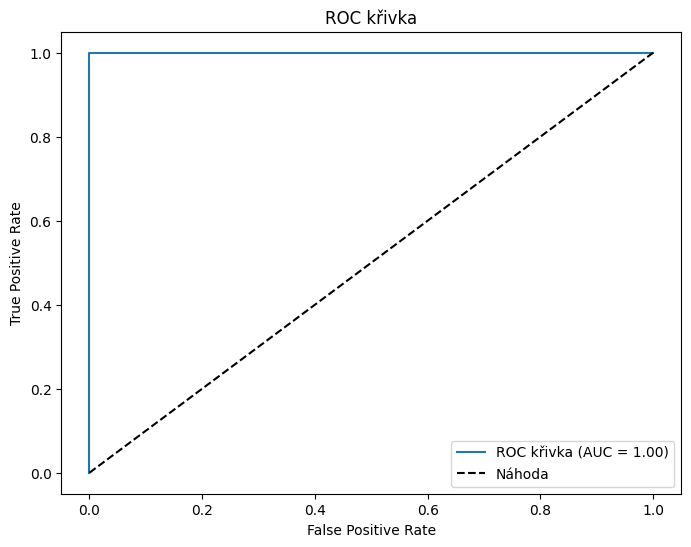

In [4]:
# Výpočet pro ROC křivku
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
auc = roc_auc_score(y_test, y_proba[:, 1])

# Vykreslení
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC křivka (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Náhoda')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC křivka')
plt.legend()
plt.show()

### 2.9.5 Interpretace naučených koeficientů

**Koeficienty modelu:**
- Intercept (bias): 0.463
- Váha pro 'Věk': 0.70
- Váha pro 'Plat': 0.73

**Interpretace:** 
Oba koeficienty jsou kladné, což znamená, že:
- Vyšší věk zvyšuje pravděpodobnost nákupu
- Vyšší plat zvyšuje pravděpodobnost nákupu
- Plat má mírně silnější vliv než věk (0.73 > 0.70)